# Apprentissage par renforcement


Le **Reinforcement Learning (RL)**, ou **Apprentissage par Renforcement**, est une méthode d'apprentissage automatique dans laquelle un agent apprend à interagir avec un environnement dans le but de maximiser une récompense cumulative.

## Composants de base du RL

Le RL repose sur plusieurs concepts clés :

1. **Environnement** : Le monde dans lequel l'agent interagit. Il peut être simulé ou réel, et définit les règles de fonctionnement, telles que les actions disponibles, les transitions d'état, et la fonction de récompense.
   
2. **Agent** : L'entité qui prend des décisions et interagit avec l'environnement pour apprendre la meilleure stratégie.

3. **État (state)** : La représentation actuelle de la situation dans laquelle se trouve l'agent.

4. **Action** : Les décisions ou mouvements que l'agent peut entreprendre à partir d'un état donné. L'ensemble des actions possibles forme l'espace d'action.

5. **Récompense (reward)** : Un signal reçu par l'agent suite à l'exécution d'une action. L'objectif de l'agent est de maximiser cette récompense cumulée sur le long terme.

6. **Politique (policy)** : La stratégie de l'agent qui détermine quelle action choisir à chaque étape. La politique peut être **déterministe** (une action spécifique pour chaque état) ou **stochastique** (une distribution de probabilité sur les actions possibles).


## Utilisation de OpenAI Gym

**OpenAI Gym** est une bibliothèque destinée au développement et à l'évaluation d'algorithmes d'apprentissage par renforcement (Reinforcement Learning, RL). Elle fournit un ensemble d'environnements standardisés permettant aux chercheurs et développeurs de tester et de comparer différentes méthodes d'apprentissage par renforcement.

### Fonctionnalités principales
- **Environnements variés** : OpenAI Gym propose une large gamme d'environnements, allant des jeux vidéo (comme Atari) à des simulations de contrôle classique (comme le pendule inversé ou le contrôle de robots).
- **API simple et standardisée** : Les environnements sont dotés d'une API cohérente pour interagir avec eux via des actions, obtenir des récompenses et observer l'état du système.
- **Terminaison** : Le processus se répète jusqu'à la fin de l'épisode, lorsque l'environnement renvoie un signal de terminaison (le jeu est gagné ou perdu, ou un certain nombre d'étapes est atteint).

In [2]:
try:
    import gym
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation
    import matplotlib.image as mpimg
    
except ImportError:
    pass

In [3]:


env = gym.make("CartPole-v1", render_mode = 'human')
observation = env.reset()   # init de l environnement crée

print(f"Les valeurs sont :")
print(f"Position horizontale du chariot : {observation[0][0]} \n")
print(f"Vitesse du chariot : {observation[0][1]} \n")
print(f"Angle du batôn : {observation[0][2]} \n")
print(f"Vitesse angulaire du batôn : {observation[0][3]} \n")


Les valeurs sont :
Position horizontale du chariot : -0.008680067025125027 

Vitesse du chariot : -0.026012346148490906 

Angle du batôn : 0.03458740934729576 

Vitesse angulaire du batôn : 0.03191355988383293 


In [4]:
env.render()

In [5]:
env.action_space

Discrete(2)

In [6]:
action = 1
observation, reward, done, _, info = env.step(action)

print(observation)
print(f"Les valeurs sont :")
print(f"Position horizontale du chariot : {observation[0]} \n")
print(f"Vitesse du chariot : {observation[1]} \n")
print(f"Angle du batôn : {observation[2]} \n")
print(f"Vitesse angulaire du batôn : {observation[3]} \n")


[-0.00920031  0.16859697  0.03522568 -0.24965917]
Les valeurs sont :
Position horizontale du chariot : -0.009200314059853554 

Vitesse du chariot : 0.16859696805477142 

Angle du batôn : 0.035225678235292435 

Vitesse angulaire du batôn : -0.24965916574001312 


C:\Users\Lucas\miniconda3\envs\gymenv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [7]:
import time 

env = gym.make("LunarLander-v2", render_mode = "human")
obs , info = env.reset(seed = int(time.time()))

for _ in range(100):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    
    if done or truncated:
        obs, info = env.reset()

env.close()

## Politique déterministes

 Pour chaque état, une action unique est toujours choisie.
  - **Exemple** : La politique gloutonne est une politique déterministe.

In [8]:
env = gym.make("CartPole-v1")

def policy(obs):
    angle = obs[2]
    return 0 if angle<0 else 1

tots = []
for epochs in range(100):
    total_reward = 0
    obs, _ = env.reset()
    for step in range(100):
        action = policy(obs)
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        if done or truncated:
            break
    tots.append(total_reward)


print(np.mean(tots), np.std(tots), np.min(tots), np.max(tots))

41.08 8.665656351367737 25.0 61.0


## Politique par réseau de neuronnes

Les **politiques par réseaux de neurones** sont des modèles qui permettent de prendre des décisions en environnement complexe et dynamique. Contrairement aux méthodes basées sur des tables ou des formules simples, les réseaux de neurones permettent de traiter un grand nombre d’états et d’actions possibles, ce qui est essentiel dans des environnements à haute dimension ou continus.

Les réseaux de neurones permettent de **généraliser** les décisions et d'apprendre des politiques non linéaires, ce qui leur permet de s’adapter aux changements et à l’incertitude dans l’environnement.

### 1. **Modèle de politique**
Un réseau de neurones est utilisé pour approximer la **politique**, c'est-à-dire la fonction qui prend l'état actuel de l'environnement comme entrée et produit soit une action, soit une distribution de probabilités sur les actions possibles.

- **Entrée** : L'état actuel de l'agent dans l'environnement.
- **Sortie** : Une action ou une probabilité d'action, que l'agent doit exécuter dans cet état.

### 2. **Méthodes basées sur les gradients de politique**
Les méthodes **policy gradient** (gradients de politique) optimisent directement la politique en ajustant les paramètres du réseau de neurones pour **maximiser la récompense totale attendue**. L'algorithme ajuste les poids du réseau pour rendre plus probables les actions qui mènent à des récompenses élevées et moins probables celles qui mènent à des faibles récompenses.

### Principe
- Les actions sont choisies aléatoirement au début, mais avec l’entraînement, les **actions efficaces** deviennent plus probables.
- L’apprentissage se fait en calculant la **récompense cumulative** de chaque épisode et en ajustant la politique en conséquence pour maximiser cette récompense.
















In [9]:
import tensorflow as tf
from tensorflow import keras

n_inputs = 4  # les entrées de la fonction step 

model = keras.models.Sequential([
    keras.layers.Dense(6, activation='elu', input_shape=[n_inputs]),
    keras.layers.Dense(1, activation='sigmoid'),
])

def pg_policy(obs):
    left_proba = model.predict(obs[np.newaxis], verbose=0)[0][0]
    return int(np.random.rand() > left_proba)

np.random.seed(0)

In [10]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))

    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, truncated, info = env.step(int(action))
    return obs, reward, done, truncated, grads

In [11]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs, info = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, truncated, grads = play_one_step(
                env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done or truncated:
                break

        all_rewards.append(current_rewards)
        all_grads.append(current_grads)

    return all_rewards, all_grads

In [12]:
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

In [13]:
discount_rewards([10, 0, -50], discount_factor=0.8)
discount_and_normalize_rewards([[10, 0, -50], [10, 20]],
                               discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [14]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

obs, info = env.reset(seed=42)

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.binary_crossentropy


In [15]:
for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))
    print(f"\rIteration: {iteration + 1}/{n_iterations},"
          f" mean rewards: {total_rewards / n_episodes_per_update:.1f}", end="")
    
    all_final_rewards = discount_and_normalize_rewards(all_rewards,discount_factor)
    all_mean_grads = []

    for var_index in range(len(model.trainable_variables)):
        weighted_gradients = []
        for episode_index, final_rewards in enumerate(all_final_rewards):
            for step, final_reward in enumerate(final_rewards):
                variable_gradient = all_grads[episode_index][step][var_index]
                weighted_gradient = final_reward * variable_gradient
                weighted_gradients.append(weighted_gradient)

        mean_grads = tf.reduce_mean(weighted_gradients, axis=0)
        all_mean_grads.append(mean_grads)
        
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))


Iteration: 150/150, mean rewards: 187.5

## Processus de décisions Markoviens

Les **chaînes de Markov** sont des processus stochastiques sans mémoire qui évoluent d'un état à un autre de manière aléatoire, selon une probabilité de transition qui dépend uniquement de l'état actuel. Cependant, dans un **processus de décision markovien (MDP)**, un agent peut choisir parmi plusieurs actions, et les probabilités de transition entre les états dépendent des actions choisies. De plus, certaines transitions génèrent des **récompenses** positives ou négatives. L'objectif de l'agent est de maximiser les récompenses cumulées au fil du temps en suivant une **politique optimale**.

### Équation d’optimalité de Bellman
Bellman a formulé une équation permettant de calculer la **valeur d’état optimale** $V^*(s)$, qui représente la somme des récompenses futures attendues en suivant une politique optimale à partir de l’état $s$.

$$ V^*(s) = \max_{a} \sum_{s'} T(s, a, s') \left[ R(s, a, s') + \gamma V^*(s') \right] $$

 **Définition des termes :**
- $T(s, a, s')$ : probabilité de transition de l’état $s$ à l’état $s'$ après l’action $a$.
- $R(s, a, s')$ : récompense obtenue pour la transition de $s$ à $s'$ avec l’action $a$.
- $\gamma$ : facteur de **rabais** qui pondère l’importance des récompenses futures.

### Algorithme d'itération sur la valeur
L’algorithme d’**itération sur la valeur** permet d’estimer progressivement les valeurs d’état optimales en mettant à jour les estimations à chaque itération, jusqu’à convergence.

$$ V_{k+1}(s) = \max_{a} \sum_{s'} T(s, a, s') \left[ R(s, a, s') + \gamma V_k(s') \right] $$

### Valeurs Q et itération sur la valeur Q
L’**algorithme d’itération sur la valeur Q** permet de calculer la **valeur Q optimale** pour chaque couple état-action $(s, a)$. La valeur $Q^*(s, a)$ représente la somme des récompenses futures pondérées après avoir effectué l’action $a$ à partir de l’état $s$, en supposant que l’agent agit de manière optimale par la suite.

$$ Q^*(s, a) = \sum_{s'} T(s, a, s') \left[ R(s, a, s') + \gamma \max_{a'} Q^*(s', a') \right] $$

### Politique optimale
Une fois que les valeurs $Q^*(s, a)$ sont connues, la **politique optimale** $\pi^*(s)$ est définie comme l'action qui maximise $Q^*(s, a)$ pour chaque état $s$ :

$$ \pi^*(s) = \arg \max_a Q^*(s, a) $$

In [16]:
# Cet exemple ne s'appuie pas sur l'image ci-dessus

proba_transition = [  # shape=[s, a, s']
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],  #s0
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]], #s1
    [None, [0.8, 0.1, 0.1], None]
]

recompenses = [  # shape=[s, a, s']
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]
]

action_possibles = [[0,1,2], [0,2], [1]]

Q_values = np.full((3,3), -np.inf)  # on met -inf pour les actions impossible
for num, actions in enumerate(action_possibles):
    Q_values[num][actions] = 0.0

print(Q_values)

gamma = 0.95

for iter in range(50):
    Q_preced = Q_values.copy()
    for state in range(3):
        for action in action_possibles[state]:
            Q_values[state, action] = np.sum([proba_transition[state][action][state_prime]*(recompenses[state][action][state_prime]+gamma*np.max(Q_preced[state_prime]))
                                             for state_prime in range(3)])
print(Q_values)    
print(Q_values.argmax(axis=1))

[[  0.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]]
[[21.73304188 20.63807938 16.70138772]
 [ 0.95462106        -inf  1.01361207]
 [       -inf 53.70728682        -inf]]
[0 2 1]


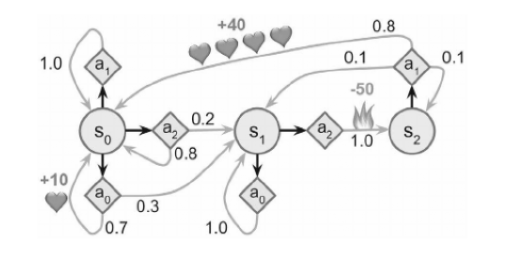

In [17]:
img = mpimg.imread('img.png')
imgplot = plt.imshow(img)
plt.axis('off') 
plt.show()

On peut alors déduire les meilleures actions à effectuer en fonction des états. Par exemple, pour l'état s2 entreprendre l'action a1 il gagne environ 50

## Apprentissage par différence temporelle 

Les problèmes d’apprentissage par renforcement avec des actions discrètes peuvent souvent être modélisés à l’aide des processus de décision markoviens. Cependant, l’agent n’a initialement aucune idée des probabilités des transitions (il ne connaît pas \( T(s, a, s') \)) et ne sait pas quelles seront les récompenses (il ne connaît pas \( R(s, a, s') \)). Il doit tester au moins une fois chaque état et chaque transition pour connaître les récompenses, et il doit le faire à plusieurs reprises s’il veut avoir une estimation raisonnable des probabilités des transitions.

L’algorithme d’apprentissage par différence temporelle, ou TD (Temporal Difference Learning), est très proche de l’algorithme d’itération sur la valeur, mais il prend en compte le fait que l’agent n’a qu’une connaissance partielle du MDP. En général, on suppose que l’agent connaît initialement uniquement les états et les actions possibles, rien de plus. Il se sert d’une politique d’exploration, par exemple une politique purement aléatoire, pour explorer le MDP. Au fur et à mesure de sa progression, l’algorithme d’apprentissage TD actualise les estimations des valeurs d’état en fonction des transitions et des récompenses observées.

### Algorithme d’apprentissage TD

$$
V_k(s) \leftarrow V_k(s) + \alpha \left[ r + \gamma V_k(s') - V_k(s) \right]
$$

ou, de façon équivalente :

$$
V_k(s) \leftarrow V_k(s) + \alpha \delta_k(s, r, s')
$$

avec

$$
\delta_k(s, r, s') = r + \gamma V_k(s') - V_k(s)
$$

### Notations

- \( \alpha \) : le taux d’apprentissage (par exemple, 0,01).
- La cible TD est donnée par :
  $$ r + \gamma V_k(s') $$
- L'erreur TD est notée :
  $$ \delta_k(s, r, s') $$

On peut y voir une analogie avec la méthode de descente du gradient

## Apprentissage Q

L'algorithme d'apprentissage Q, ou Q-Learning, est une approche qui adapte l'algorithme d'itération sur la valeur Q pour les situations où les probabilités de transition et les récompenses ne sont pas connues au départ. Cet algorithme permet à un agent d'apprendre en jouant, souvent de manière aléatoire, et d'améliorer progressivement ses estimations des valeurs Q. Une fois que l'agent a des estimations de valeur Q suffisamment précises, il peut adopter une politique optimale en choisissant l'action avec la valeur Q la plus élevée, c'est-à-dire en suivant une politique gloutonne.

### Algorithme d'apprentissage Q

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right)
$$

Pour chaque paire état-action \((s, a)\), cet algorithme calcule une moyenne mobile des récompenses \(r\) que l'agent reçoit lorsqu'il quitte l'état \(s\) après avoir effectué l'action \(a\), ainsi que la somme des récompenses futures anticipées. Étant donné que la politique cible fonctionnera de manière optimale, cette somme est estimée en prenant le maximum des valeurs Q pour les actions possibles dans l'état suivant \(s'\).

In [18]:
def make_step(state, action):
    probas = proba_transition[state][action] # on recupere le vecteur des probas
    next_state = np.random.choice([0,1,2],p=probas)
    reward = recompenses[state][action][next_state]
    return next_state,reward

make_step(2,1)

(0, 40)

In [19]:
def policy_exp(state):
    return np.random.choice(action_possibles[state])

policy_exp(1)

2

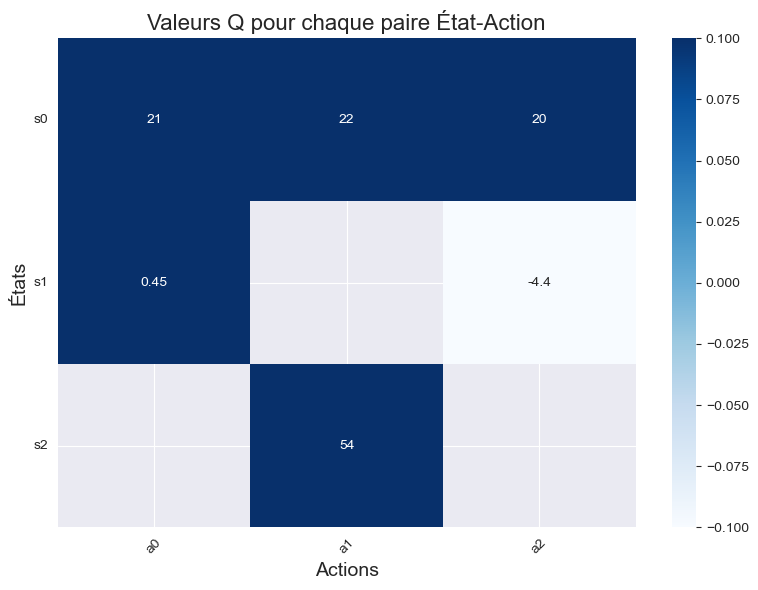

In [20]:
import seaborn as sns

alpha_0 = 0.05
alpha_dim_factor = 0.005
gamma = 0.90
state = 0

for iter in range(500):
    action = policy_exp(state) # cas initial
    next_state, reward = make_step(state, action)
    next_value = np.max(Q_values[next_state])
    alpha = alpha_0*(1/1+iter*alpha_dim_factor)
    Q_values[state,action] *= (1 - alpha)
    Q_values[state,action] += alpha*(reward+gamma*next_value)
    state = next_state

num_states = 3
num_actions = 3

plt.figure(figsize=(8, 6))
sns.heatmap(Q_values, annot=True, cmap='Blues', cbar=True, 
            xticklabels=[f'a{i}' for i in range(num_actions)], 
            yticklabels=[f's{i}' for i in range(num_states)])

plt.title('Valeurs Q pour chaque paire État-Action', fontsize=16)
plt.xlabel('Actions', fontsize=14)
plt.ylabel('États', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Afficher le graphique
plt.show()


## Apprentissage Q et Convergence

Cet algorithme converge vers les valeurs Q optimales, mais il nécessite un nombre considérable d'itérations et potentiellement de nombreux ajustements des hyperparamètres. L'algorithme d'itération sur la valeur Q atteint rapidement la convergence en moins de 20 itérations, tandis que l'algorithme d'apprentissage Q (illustré à droite) requiert environ 8 000 itérations pour converger. Il est évident que l'absence de connaissances sur les probabilités de transition ou les récompenses rend la recherche de la politique optimale beaucoup plus complexe !

L'algorithme d'apprentissage Q est considéré comme un algorithme de politique hors ligne (off-policy), car la politique qui est entraînée n'est pas nécessairement celle qui est mise en œuvre. Dans le code précédent, la politique appliquée (la politique d'exploration) est entièrement aléatoire, tandis que la politique entraînée privilégie toujours les actions avec les valeurs Q les plus élevées. À l'inverse, l'algorithme des gradients de politique est un algorithme de politique en ligne (on-policy), car il explore l'environnement en utilisant la politique actuellement entraînée. Il est plutôt surprenant que l'apprentissage Q puisse découvrir la politique optimale simplement en observant un agent agir de manière aléatoire, comme si l'on pouvait apprendre à jouer au golf en regardant un singe ivre jouer.

### Politiques d'exploration

L'apprentissage Q n'est efficace que si la politique d'exploration couvre suffisamment l'espace d'état du MDP. Bien qu'une politique aléatoire finisse par visiter chaque état et chaque transition à plusieurs reprises, elle pourrait prendre un temps excessif pour y parvenir. Une stratégie plus efficace consiste à utiliser la politique ε-greedy (où ε représente epsilon) : à chaque étape, elle agit de manière aléatoire avec une probabilité ε, ou choisit la meilleure action avec une probabilité de 1−ε (c'est-à-dire en sélectionnant l'action avec la valeur Q la plus élevée). Par rapport à une politique totalement aléatoire, la politique ε-greedy a l'avantage d'explorer davantage les zones prometteuses de l'environnement, tout en continuant à visiter des régions moins connues à mesure que les estimations des valeurs Q s'améliorent. Il est courant de commencer avec une valeur élevée pour ε (par exemple, 1,0) puis de la réduire progressivement (jusqu'à environ 0,05).

Au lieu d'une exploration totalement aléatoire, une autre approche consiste à inciter la politique d'exploration à essayer des actions qu'elle a moins souvent testées auparavant. Cela peut être réalisé en ajoutant un bonus aux estimations de la valeur Q (voir l'équation 10.6).

### Apprentissage Q avec une fonction d'exploration

$$
Q(s,a) \leftarrow (1 - \alpha) Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') + f(Q,N) \right)
$$

Dans cette équation :
- $N(s', a')$ représente le nombre de fois où l'action $a'$ a été choisie dans l'état $s'$.
- $f(Q, N)$ est une fonction d'exploration, par exemple $f(Q, N) = Q + \frac{\kappa}{1 + N}$, où $\kappa$ est un hyperparamètre de curiosité qui mesure l'attrait de l'agent pour l'inconnu.

# Réseaux Q profond

Les réseaux Q profonds (Deep Q-Networks, DQN) sont une extension des algorithmes d'apprentissage Q qui intègrent des réseaux de neurones profonds pour approximer les valeurs Q. Cette approche a été introduite par les chercheurs de DeepMind dans le cadre de leur travail sur le jeu Atari, où elle a montré des performances remarquables.


## Motivation

Une des principales forces des DQN est leur capacité à traiter des situations où il existe un nombre énorme de possibilités. Par exemple, dans des jeux vidéo ou des environnements de simulation complexes, le nombre d'états possibles peut être astronomique. Les DQN permettent de généraliser l'apprentissage sur ces espaces vastes en apprenant à partir d'exemples et en adaptant les poids du réseau de neurones au fil du temps.

## Apprentissage Q par Approximation

La clé réside dans la définition d'une fonction \( Q_q(s, a) \) qui permet d'approcher la valeur Q pour tout couple état-action \((s, a)\), tout en utilisant un nombre de paramètres raisonnable, spécifié par le vecteur de paramètres \( q \). Cette méthode est désignée sous le terme **apprentissage Q par approximation**.

Historiquement, on conseillait d’utiliser des combinaisons linéaires de caractéristiques définies manuellement à partir de l’état (comme la distance aux fantômes les plus proches, leur orientation, etc.) pour estimer les valeurs Q. Toutefois, en 2013, DeepMind a démontré que l'emploi de réseaux de neurones profonds peut offrir des performances nettement supérieures, surtout dans le cadre de problèmes complexes. Cela permet également d'économiser le temps nécessaire pour développer des caractéristiques efficaces.

Un réseau de neurones utilisé pour estimer les valeurs Q est connu sous le nom de **réseau Q profond** (DQN, Deep Q-Network), et l'application de ce DQN dans le cadre de l'apprentissage Q par approximation est appelée **apprentissage Q profond** (Deep Q-Learning).

### Entraînement d'un DQN

Comment peut-on s'y prendre pour entraîner un DQN ? Pour le comprendre, examinons comment le DQN estime la valeur Q pour un couple état-action \((s, a)\). Selon l'équation de Bellman, il est essentiel que cette estimation se rapproche le plus possible de la récompense \( r \) que l’on reçoit après avoir effectué l'action \( a \) dans l'état \( s \), plus la somme des récompenses futures actualisées que l'on peut anticiper en adoptant une stratégie optimale par la suite.

Pour obtenir cette estimation, il suffit d'appliquer le DQN à l'état suivant \( s' \) et d'évaluer toutes les actions possibles \( a' \). Cela nous permet de calculer la valeur Q pour chaque action suivante. En sélectionnant la valeur maximale (en supposant que l'on agisse de manière optimale) et en y appliquant un facteur de rabais, nous pouvons obtenir une estimation de la somme des récompenses futures actualisées. En y ajoutant la récompense \( r \), nous définissons ainsi une **valeur Q cible** \( Q(s, a) \) pour le couple état-action \((s, a)\) (voir l’équation 10.7).

#### Valeur Q cible
$$
Q(s, a) = r + \gamma \max_{a'} Q(s', a')
$$

Une fois que nous avons cette valeur Q cible, nous sommes en mesure d'effectuer une étape d’entraînement en recourant à n'importe quel algorithme de descente de gradient. En pratique, notre objectif est généralement de réduire l'erreur quadratique entre la valeur Q estimée \( Q(s, a) \) et la valeur Q cible. Pour cela, nous pouvons également utiliser la perte de Huber afin de diminuer la sensibilité de l'algorithme aux erreurs considérables.

Nous avons ainsi couvert les bases de l'apprentissage Q profond. Passons maintenant à la mise en œuvre de cette approche pour résoudre le problème de l'environnement CartPole.



In [30]:
env = gym.make("CartPole-v1")
#print(env.observation_space.shape) # renvoie 4
input_shape = [4] 
#print(env.action_space) # Discrete(2)
output_shape = 2

model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape = input_shape),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(output_shape)
])

In [29]:
def epsilon_greedy(state, epsilon = 0):
    if np.random.rand() < epsilon:
        return np.random.randint(2)
    else:
        Q_values = model.predict(state[np.newaxis])
        print(Q_values.shape)
        return np.argmax(Q_values[0])

In [41]:
from collections import deque

replay_buffer = deque(maxlen = 200)

def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[index] for index in indices]
    states, actions, rewards, next_states, dones, truncateds = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(6)
    ]
    return states, actions, rewards, next_states, dones, truncateds

In [45]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy(state,epsilon)
    next_state,reward,done,truncated,info = env.step(action)
    replay_buffer.append((state,action,reward,next_state,done,truncated))
    return next_state,reward,done,truncated,done

In [59]:
batch_size = 32
discount_factor = 0.95
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_fn = keras.losses.mean_squared_error

def training_one_step(batch_size):
    exp = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = exp
    next_q_values = model.predict(next_states, verbose=0)
    max_q = np.max(next_q_values, axis=1)
    target_q = (rewards + (1-dones)*discount_factor*max_q)
    mask = tf.one_hot(actions,output_shape)
    
    with tf.GradientTape() as tape:
        all_q = model.predict(states)
        Q_values = tf.reduce_sum(all_q*mask, axis=1,keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_q,Q_values))
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [60]:
rewards = [] 
best_score = 0

for episode in range(600):
    obs, info = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, truncated, info = play_one_step(env, obs, epsilon)
        if done or truncated:
            break
            
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}",
          end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_one_step(batch_size)

model.set_weights(best_weights) 

1/1 [==============================] - 0s 13ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 16ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 18ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 18ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 18ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 16ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 

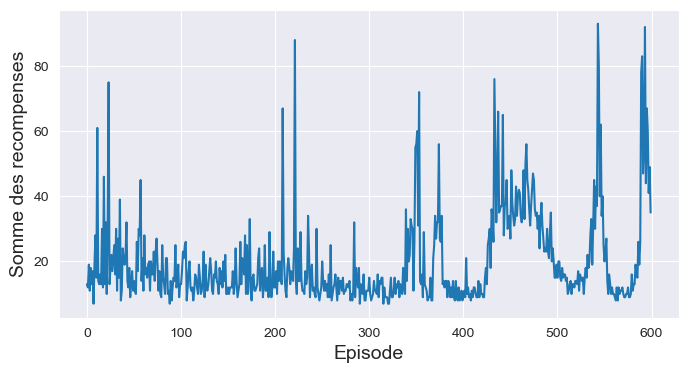

In [64]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Somme des recompenses", fontsize=14)
plt.grid(True)
plt.savefig("dqn_rewards_plot")
plt.show()

## Variantes de l'apprentissage Q profond

### Cibles de la valeur Q Fixées

Dans l'algorithme de base de l'apprentissage Q profond, le même modèle est utilisé pour faire des prédictions et pour définir ses propres cibles. Cela peut entraîner une rétroaction instable, provoquant des problèmes tels que des divergences ou des oscillations. Pour résoudre ce problème, DeepMind a proposé, dans son article de 2013, d'utiliser deux DQN au lieu d'un.

- **Modèle en ligne** : Ce modèle apprend à chaque étape et détermine les actions de l'agent.
- **Modèle cible** : Utilisé uniquement pour définir les cibles, il est un clone du modèle en ligne. On peut créer ce modèle cible en utilisant la méthode suivante :




In [66]:
target = tf.keras.models.clone_model(model) 
target.set_weights(model.get_weights())

rewards = [] 
best_score = 0

def training_one_step(batch_size):
    exp = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = exp
    next_q_values = target.predict(next_states, verbose=0)
    max_q = np.max(next_q_values, axis=1)
    target_q = (rewards + (1-dones)*discount_factor*max_q)
    mask = tf.one_hot(actions,output_shape)
    
    with tf.GradientTape() as tape:
        all_q = model.predict(states)
        Q_values = tf.reduce_sum(all_q*mask, axis=1,keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_q,Q_values))
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    
for episode in range(600):
    obs, info = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, truncated, info = play_one_step(env, obs, epsilon)
        if done or truncated:
            break
            
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}",
          end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode % 50:
        target.set_weights(model.get_weights())

model.set_weights(best_weights) 

1/1 [==============================] - 0s 14ms/step
(1, 2)
1/1 [==============================] - 0s 16ms/step
(1, 2)
1/1 [==============================] - 0s 16ms/step
(1, 2)
1/1 [==============================] - 0s 18ms/step
(1, 2)
1/1 [==============================] - 0s 18ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 16ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 20ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 16ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 18ms/step
(1, 2)
1/1 [==============================] - 0s 17ms/step
(1, 2)
1/1 [==============================] - 0s 18ms/step
(1, 

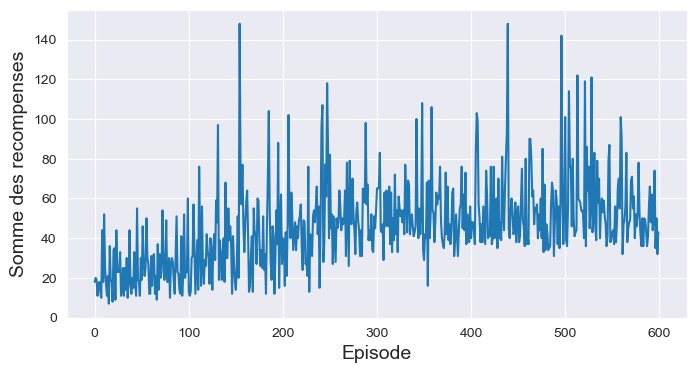

In [67]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Somme des recompenses", fontsize=14)
plt.grid(True)
plt.savefig("dqn_rewards_plot_2DNN")
plt.show()

## Double Deep-Q-Network

En 2015, des chercheurs de DeepMind ont amélioré leur algorithme DQN, ce qui a permis d'optimiser ses performances et de stabiliser le processus d'entraînement. Cette version améliorée est désignée sous le nom de **DQN double**.

### Problème de Surestimation

Cette amélioration repose sur une observation clé : le réseau cible a une tendance à surestimer les valeurs Q. En considérant que toutes les actions sont égales, on devrait s'attendre à ce que les valeurs Q estimées par le modèle cible soient cohérentes. Toutefois, étant donné qu'il s'agit d'approximations, certaines valeurs peuvent apparaître légèrement plus élevées que d'autres, souvent par accident.

Le modèle cible opte systématiquement pour la valeur Q la plus élevée, ce qui peut entraîner une surestimation par rapport à la valeur Q moyenne, faussant ainsi l'estimation réelle.

### Solution Proposée

Pour remédier à ce biais de surestimation, les chercheurs ont suggéré d'employer le modèle en ligne pour sélectionner les meilleures actions à venir, tandis que le modèle cible serait uniquement utilisé pour évaluer les valeurs Q associées à ces actions optimales.